Enter the number of samples:  40
Enter the minimum value for X:  1
Enter the maximum value for X:  20
Enter the noise level:  0.2
Enter the regularization parameter (alpha):  2


Randomly Generated Data (X, y):
X: 8.12, y: 10.59
X: 19.06, y: 126.31
X: 14.91, y: 68.56
X: 12.37, y: 41.20
X: 3.96, y: -1.99
X: 3.96, y: -2.43
X: 2.10, y: -2.36
X: 17.46, y: 102.05
X: 12.42, y: 42.03
X: 14.45, y: 63.12
X: 1.39, y: -1.23
X: 19.43, y: 132.38
X: 16.82, y: 92.65
X: 5.03, y: -0.57
X: 4.45, y: -1.53
X: 4.48, y: -1.19
X: 6.78, y: 4.72
X: 10.97, y: 28.91
X: 9.21, y: 16.83
X: 6.53, y: 3.67
X: 12.63, y: 43.69
X: 3.65, y: -2.17
X: 6.55, y: 4.01
X: 7.96, y: 9.99
X: 9.67, y: 19.55
X: 15.92, y: 80.88
X: 4.79, y: -0.82
X: 10.77, y: 27.89
X: 12.26, y: 40.24
X: 1.88, y: -1.91
X: 12.54, y: 42.82
X: 4.24, y: -1.97
X: 2.24, y: -2.05
X: 19.03, y: 126.23
X: 19.35, y: 131.10
X: 16.36, y: 86.94
X: 6.79, y: 4.75
X: 2.86, y: -2.62
X: 14.00, y: 58.08
X: 9.36, y: 18.05


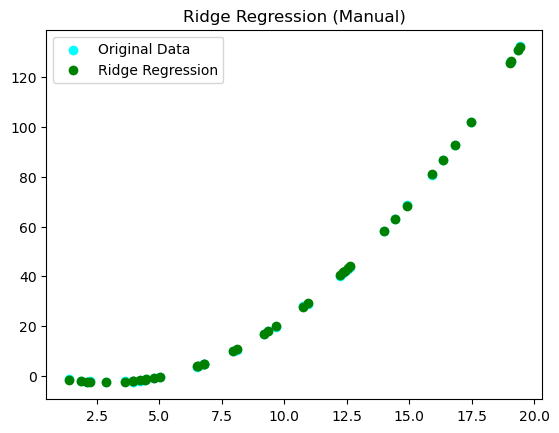

Ridge Regression Coefficients (theta): [ 1.56287301 -2.89550567  0.49526074]


In [14]:
import numpy as np
import matplotlib.pyplot as plt

# User input for generating random data
n_samples = int(input("Enter the number of samples: "))
x_min = float(input("Enter the minimum value for X: "))
x_max = float(input("Enter the maximum value for X: "))
noise_level = float(input("Enter the noise level: "))
alpha = float(input("Enter the regularization parameter (alpha): "))

# Seed for reproducibility
np.random.seed(42)

# Generating random data based on user input
X = np.random.rand(n_samples, 1) * (x_max - x_min) + x_min
y = 2 + 0.5 * X**2 - 3 * X + np.random.randn(n_samples, 1) * noise_level

# Display the randomly generated data
print("Randomly Generated Data (X, y):")
for i in range(n_samples):
    print(f"X: {X[i][0]:.2f}, y: {y[i][0]:.2f}")

# Adding polynomial features (degree 2) manually
X_poly = np.hstack((X, X**2))

# Adding bias term (ones column) for intercept
X_poly_bias = np.hstack([np.ones((n_samples, 1)), X_poly])

# Ridge regression closed-form solution: theta = (X.T * X + alpha * I)^-1 * X.T * y
I = np.eye(X_poly_bias.shape[1])
I[0, 0] = 0  # Do not regularize the bias term
theta_ridge = np.linalg.inv(X_poly_bias.T @ X_poly_bias + alpha * I) @ X_poly_bias.T @ y

# Predicting values using Ridge Regression model
y_pred_ridge = X_poly_bias @ theta_ridge

# Plotting the results
plt.scatter(X, y, color='cyan', label='Original Data')
plt.scatter(X, y_pred_ridge, color='green', label='Ridge Regression')
plt.title('Ridge Regression (Manual)')
plt.legend()
plt.show()

# Display theta values
print(f"Ridge Regression Coefficients (theta): {theta_ridge.ravel()}")